<a href="https://colab.research.google.com/github/Ductrinh01/AI_Exercises_CNN/blob/main/BT_FaceDetecte_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

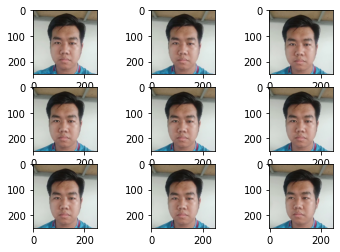

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Data_AI/Face_Detect/3NG_AI/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanDuc_020'+str(i+1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [5]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Data_AI/Face_Detect/3NG_AI/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanDuc'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

  else:
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Face_Detect_photos.npy', photos)
save('Face_Detect_labels.npy', labels)

(361, 200, 200, 3) (361,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
 history = model.fit(photos, labels, epochs=10, verbose=1)

Epoch 1/10
12/12 [==============================] - 12s 67ms/step - loss: 748.9792 - accuracy: 0.6731
Epoch 2/10
12/12 [==============================] - 1s 42ms/step - loss: 0.5856 - accuracy: 0.9668
Epoch 3/10
12/12 [==============================] - 1s 44ms/step - loss: 0.1189 - accuracy: 0.9889
Epoch 4/10
12/12 [==============================] - 1s 43ms/step - loss: 0.0219 - accuracy: 0.9972
Epoch 5/10
12/12 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 1s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 1s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 1s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 1s 43ms/step - loss: 0.0000e+00 -

In [8]:
model.evaluate(photos,labels)

12/12 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [9]:
model.save('Face_Detect_Final.h5')

In [10]:
from keras.models import load_model
models=load_model('Face_Detect_Final.h5')

In [11]:
classes = ["Sai","Dung"]

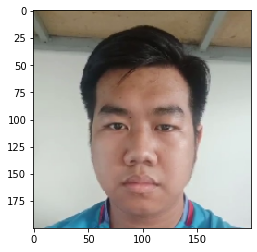

In [20]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Data_AI/Face_Detect/3NG_AI/BanDuc_0206.bmp', target_size=(200,200))
plt.imshow(img)

In [21]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
print('day la ban Duc:',classes[y_classes[0]])

[[0.23420544 0.7657946 ]]
day la ban Duc: Dung
